In [ ]:
### IT 542: PRML Assignment
##### Logistic Regression
1. Use IRIS data to generate training data and test data. 
* Perform K-NN classification on Test data.
* Perform logistic regression on training data and classify test data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [2]:
df = pd.read_csv("iris.csv")

In [3]:
y = df['variety'].values
X = df.drop('variety', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

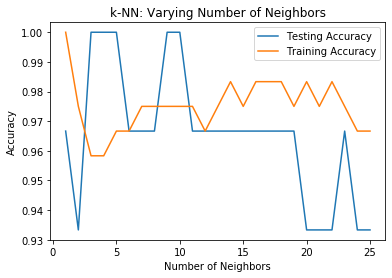

In [4]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 26)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [5]:
# Create a k-NN classifier with 9 neighbors
knn = KNeighborsClassifier(n_neighbors=9)

# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [6]:
# Predict the labels for the training data X
y_pred = knn.predict(X_train)

# Predict and print the label for the new data point X_new
knn_prediction = knn.predict(X_test)
print("Actual: {}".format(y_test))
print()
print("Prediction: {}".format(knn_prediction))


Actual: ['Setosa' 'Virginica' 'Versicolor' 'Versicolor' 'Setosa' 'Versicolor'
 'Setosa' 'Setosa' 'Virginica' 'Versicolor' 'Virginica' 'Virginica'
 'Virginica' 'Versicolor' 'Setosa' 'Setosa' 'Setosa' 'Versicolor'
 'Versicolor' 'Virginica' 'Setosa' 'Virginica' 'Versicolor' 'Virginica'
 'Virginica' 'Versicolor' 'Versicolor' 'Setosa' 'Virginica' 'Setosa']

Prediction: ['Setosa' 'Virginica' 'Versicolor' 'Versicolor' 'Setosa' 'Versicolor'
 'Setosa' 'Setosa' 'Virginica' 'Versicolor' 'Virginica' 'Virginica'
 'Virginica' 'Versicolor' 'Setosa' 'Setosa' 'Setosa' 'Versicolor'
 'Versicolor' 'Virginica' 'Setosa' 'Virginica' 'Versicolor' 'Virginica'
 'Virginica' 'Versicolor' 'Versicolor' 'Setosa' 'Virginica' 'Setosa']


In [7]:
print("KNN Score on Training Data:" ,knn.score(X_train, y_train))
print("KNN Score on Testing Data:" ,knn.score(X_test, y_test))

print()

#Check precision, recall, f1-score
print( classification_report(y_test, knn_prediction) )
print( "Accuracy Score:", accuracy_score(y_test, knn_prediction))

KNN Score on Training Data: 0.975
KNN Score on Testing Data: 1.0

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00        10
   Virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy Score: 1.0


In [8]:
logReg = LogisticRegression()
logReg.fit(X_train, y_train) #Training the model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
#Test the model
logReg_predictions = logReg.predict(X_test)
print("Actual: {}".format(y_test))
print()
# printing predictions
print("Prediction: {}".format(logReg_predictions))
print()
#Check precision, recall, f1-score
print( classification_report(y_test, logReg_predictions) )
print( "Accuracy Score:", accuracy_score(y_test, logReg_predictions))

Actual: ['Setosa' 'Virginica' 'Versicolor' 'Versicolor' 'Setosa' 'Versicolor'
 'Setosa' 'Setosa' 'Virginica' 'Versicolor' 'Virginica' 'Virginica'
 'Virginica' 'Versicolor' 'Setosa' 'Setosa' 'Setosa' 'Versicolor'
 'Versicolor' 'Virginica' 'Setosa' 'Virginica' 'Versicolor' 'Virginica'
 'Virginica' 'Versicolor' 'Versicolor' 'Setosa' 'Virginica' 'Setosa']

Prediction: ['Setosa' 'Virginica' 'Versicolor' 'Versicolor' 'Setosa' 'Versicolor'
 'Setosa' 'Setosa' 'Virginica' 'Versicolor' 'Virginica' 'Virginica'
 'Virginica' 'Versicolor' 'Setosa' 'Setosa' 'Setosa' 'Versicolor'
 'Versicolor' 'Virginica' 'Setosa' 'Virginica' 'Versicolor' 'Virginica'
 'Virginica' 'Virginica' 'Versicolor' 'Setosa' 'Virginica' 'Setosa']

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      0.90      0.95        10
   Virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg   